<h1> <center> <font color="green"> Logistic Regression </center></h2>

<center><img src="pics/logistic.jpeg" width=800 height=400></center>

<h2> <font color="blue"> Pros </h2>

1. Easy to undestnad. 
2. Can model linear type of relationship very well.
3. Do not has <b>assumptions</b> like "linear" regression.

<h2><font color = "red"> Cons </h2>

<h2> <font color="green"> How it Works !! </h2>

<h2> Implementation </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit = pd.read_csv('/Users/bt/Documents/GITHUB/creditcard.csv')
credit.drop('Time', axis=1, inplace=True)

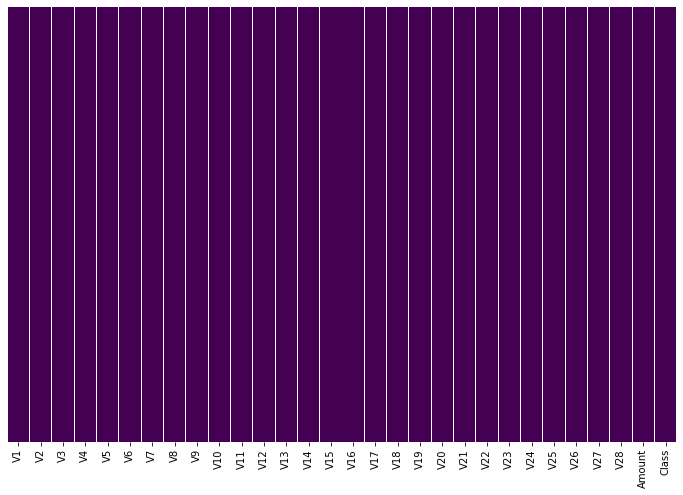

In [3]:
# Check missing data
plt.figure(figsize=(12,8))
sns.heatmap(credit.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

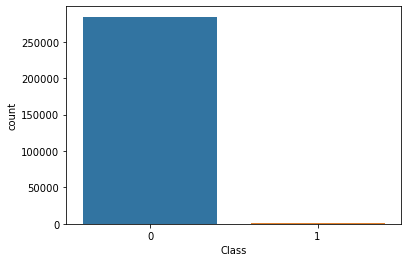

In [4]:
# Highly unbalanced dataset
sns.countplot(x='Class', data=credit)
plt.show()

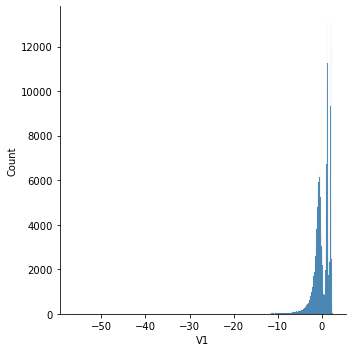

In [5]:
# Seems like very skewed distribution
sns.displot(credit['V1'])

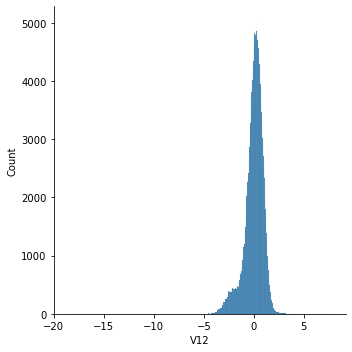

In [6]:
sns.displot(credit['V12'])

<AxesSubplot:>

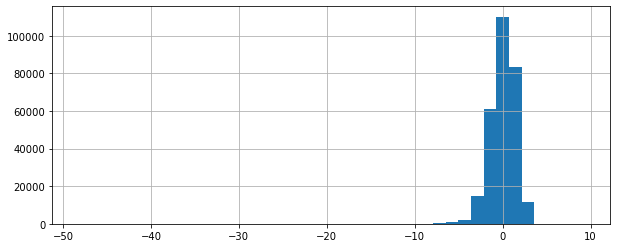

In [7]:
credit['V3'].hist(bins=40,figsize=(10,4))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
X = credit.drop('Class',axis=1)
y = credit['Class'].ravel()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,shuffle=True)

In [16]:
# Scale the variables

min_max = MinMaxScaler()

X_train = min_max.fit_transform(X_train)

In [17]:
X_test = min_max.transform(X_test)

In [18]:
logmodel = LogisticRegression()

In [19]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score, confusion_matrix

In [22]:
print("Recall Score : ", recall_score(y_test,predictions))
print("Precision Score : ", precision_score(y_test,predictions))
print("Accuracy Score : ", accuracy_score(y_test,predictions))

Recall Score :  0.5540540540540541
Precision Score :  0.8282828282828283
Accuracy Score :  0.9990285921608558


In [23]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [24]:
lr = LogisticRegression()

pprint(lr.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [123]:
C = [1000,10_000,100_000]
tol = [0.0001,0.001,0.01]

In [126]:
params = {
    'C' : C,
    'tol' : tol
}

In [127]:
params

{'C': [1000, 10000, 100000], 'tol': [0.0001, 0.001, 0.01]}

In [128]:
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar

In [129]:
LR = LogisticRegression(max_iter=1000)

In [130]:
lr_grid_Search = GridSearchCV(LR,param_grid=params,cv=10,n_jobs=-1,scoring='recall',verbose=2)

In [131]:
lr_grid_Search.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.5min finished


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [1000, 10000, 100000],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='recall', verbose=2)

In [132]:
lr_grid_Search.best_params_

{'C': 10000, 'tol': 0.0001}

In [133]:
lr_grid_Search.best_score_

0.6336134453781512

In [136]:
new_model = LogisticRegression(**lr_grid_Search.best_params_, max_iter=1000)

In [137]:
new_model.fit(X_train,y_train)

LogisticRegression(C=10000, max_iter=1000)

In [138]:
predictions = new_model.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score, confusion_matrix, classification_report

In [145]:
print("Accuracy Score : ", accuracy_score(y_test,predictions))
print("Recall Score : ", recall_score(y_test,predictions))
print("Precision Score : ", precision_score(y_test,predictions))

Accuracy Score :  0.9991924440855307
Recall Score :  0.6283783783783784
Precision Score :  0.8691588785046729


In [146]:
print(confusion_matrix(y_test,predictions))

[[85281    14]
 [   55    93]]


In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [151]:
tn, fp, fn , tp = confusion_matrix(y_test,predictions).ravel()

In [221]:
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold

In [239]:
logistic_cross_val = cross_val_score(LogisticRegression(C=1000,tol=0.0001,penalty='l2',max_iter=1000),X_train,y_train,scoring='recall',verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   4.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ................................................. , total=   4.6s
[CV]  ................................................................
[CV] ................................................. , total=   5.1s
[CV]  ................................................................
[CV] ................................................. , total=   4.8s
[CV]  ................................................................
[CV] ................................................. , total=   5.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.7s finished


In [240]:
np.mean(logistic_cross_val)

0.6252770673486786

<h2> <center> <font color ="blue"> Learning Curve </center></h2>

To identify if the Logisitc Regression is performing on Training and Test Data.

This will help us to identify if the regression is **overfitting** or **underfitting**

In [254]:
from matplotlib import pyplot
from sklearn.model_selection import learning_curve

In [248]:
train_size, train_score, test_score = learning_curve(LogisticRegression(C=1000,tol=0.0001,penalty='l2',max_iter=1000),
                                                    X_train,
                                                    y_train,
                                                    cv=10,
                                                    scoring='recall',
                                                    n_jobs=-1,
                                                    train_sizes=np.linspace(0.01,1.0,50))

In [249]:
train_means = np.mean(train_score,axis=1)

In [250]:
train_means

array([       nan, 1.        , 0.80181818, 0.8145098 , 0.811     ,
       0.81428571, 0.71319328, 0.77995338, 0.66430944, 0.65695755,
       0.65599498, 0.65367965, 0.6624486 , 0.67346835, 0.68655172,
       0.64033093, 0.64702948, 0.64685714, 0.61237683, 0.62601451,
       0.6266129 , 0.61727821, 0.62072571, 0.62370893, 0.61884932,
       0.62125338, 0.62711191, 0.63038793, 0.62599873, 0.62977333,
       0.62999291, 0.64514151, 0.63462479, 0.64112674, 0.6470931 ,
       0.64537394, 0.63930676, 0.64646137, 0.64020995, 0.64132152,
       0.64247319, 0.64334272, 0.64198117, 0.63958256, 0.63103099,
       0.62194496, 0.63463392, 0.63902751, 0.64160462, 0.63404426])

In [251]:
test_means = np.mean(test_score,axis=1)
test_means

array([       nan, 0.69226891, 0.71529412, 0.71823529, 0.73277311,
       0.72394958, 0.63630252, 0.67134454, 0.57781513, 0.55764706,
       0.56352941, 0.60134454, 0.62168067, 0.62756303, 0.64529412,
       0.61588235, 0.61302521, 0.63344538, 0.62781513, 0.62781513,
       0.62781513, 0.63352941, 0.63638655, 0.63344538, 0.62168067,
       0.62176471, 0.62470588, 0.63067227, 0.63067227, 0.63361345,
       0.62764706, 0.63932773, 0.63067227, 0.63361345, 0.65386555,
       0.64235294, 0.6394958 , 0.64521008, 0.63655462, 0.6394958 ,
       0.64529412, 0.63941176, 0.64235294, 0.63638655, 0.63058824,
       0.62773109, 0.63352941, 0.63067227, 0.63067227, 0.63067227])

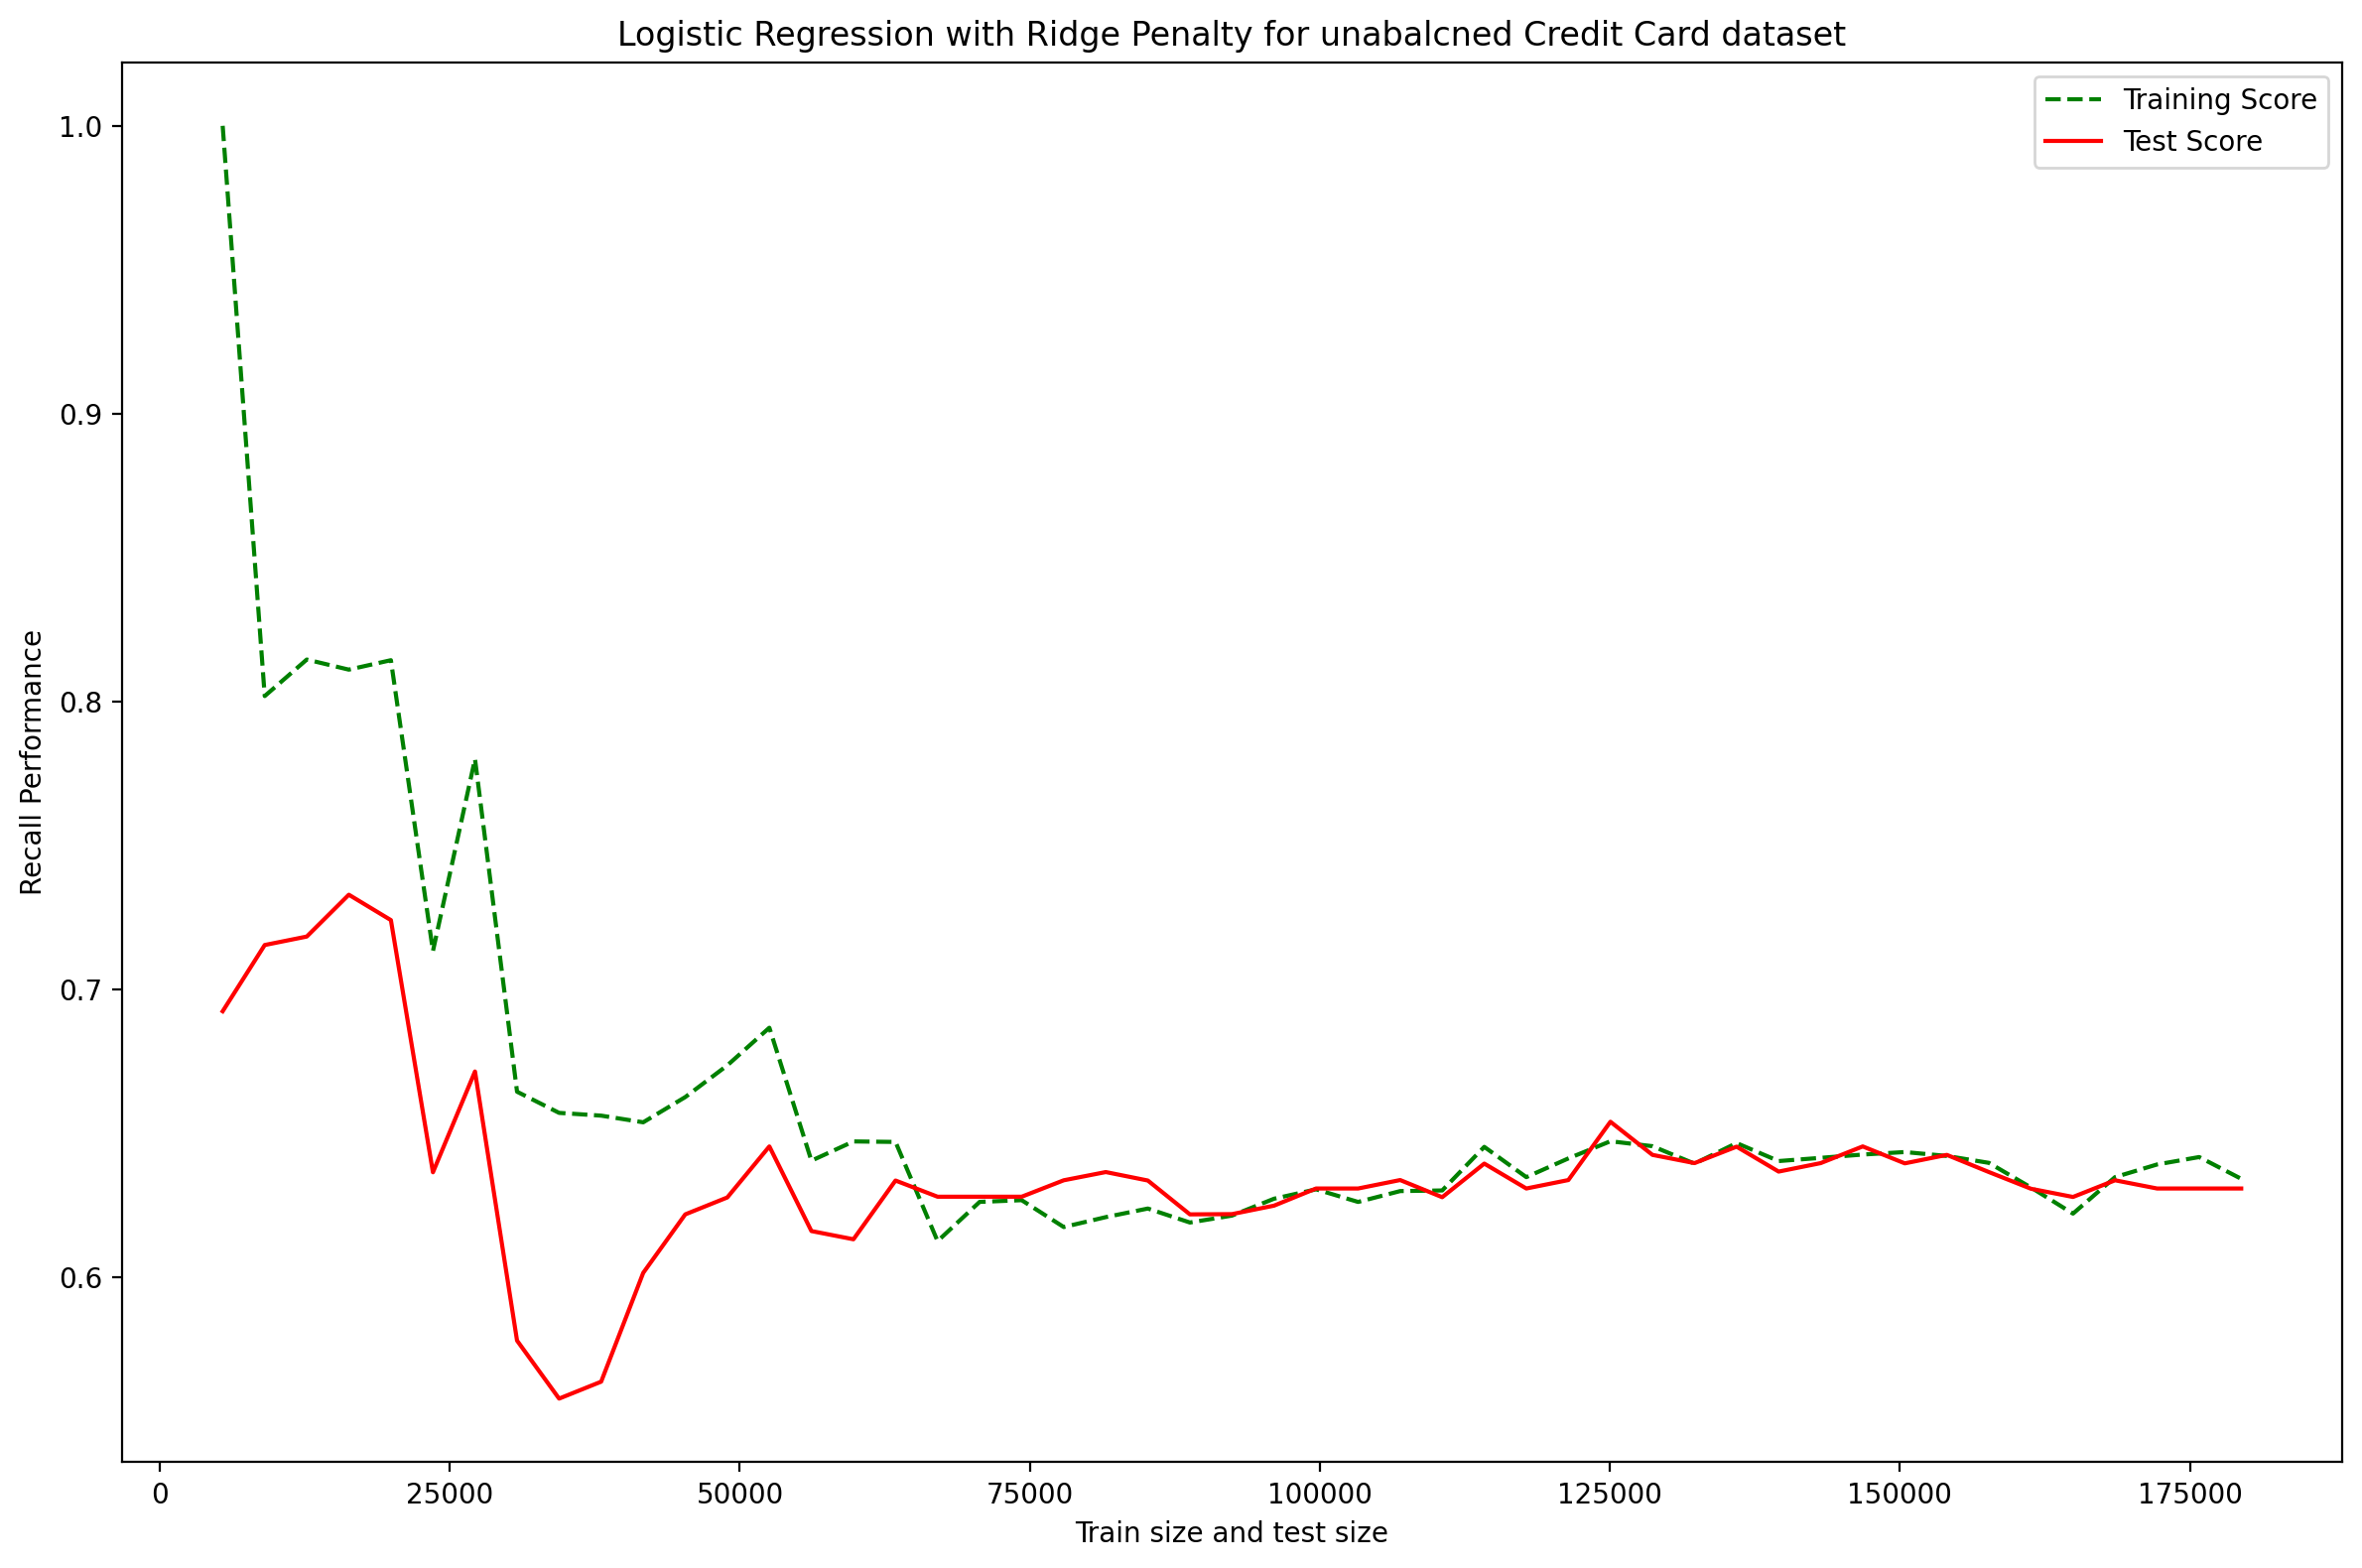

In [257]:
pyplot.figure(figsize=(12,8),dpi=200)
pyplot.plot(train_size,train_means,linestyle="--", color="g", label="Training Score")
pyplot.plot(train_size,test_means,linestyle="-",color="r",label="Test Score")
pyplot.xlabel("Train size and test size")
pyplot.ylabel("Recall Performance")
pyplot.title("Logistic Regression with Ridge Penalty for unabalcned Credit Card dataset")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()